# **Predictive Analytic - Klasifikasi Diabetes**

- **Nama:** Duma Mora Arta Sitorus
- **Email:** dumamora5@gmail.com
- **ID Dicoding:** duma_mora

1.   **Deskripsi Proyek:** Membangun model machine learning yang dapat melakukan prediksi terhadap data untuk menetukan apakah seseorang mengidap penyakit diabetes atau tidak.

2.   **Dataset:** Dataset yang digunakan diperoleh dari repository penyedia dataset [Kagle](https://www.kaggle.com/) yang bernama [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

   Data berasal dari Institut Nasional Penyakit Diabetes, Pencernaan, dan Ginjal. Dataset ini dapat digunakan untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak berdasarkan pengukuran diagnostik seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, kadar insulin, BMI, fungsi silsilah diabetes, serta usia(tahun).

  Data yang terdapat dalam dataset tersebut diambil dari pasien berjenis kelamin perempuan berusia minimal 21 tahun dan merupakan keturunan Indian Pima.

3.   **Fitur Dataset:** Dataset terdiri dari 9 fitur (8 variabel + 1 target) dan 768 data pengukuran. Fittur pada dataset adalah sebagai berikut:
  *   **pregnancies**: Jumlah kehamilan
  *   **Glucose**: Kadar glukosa (gula) dalam plasma darah setelah 2 jam menjalani Oral Glucose Tolerance Test (OGTT).
  *   **BloodPressure**: Tekanan darah diastolik  dalam satuan mm Hg
  *   **SkinThickness**: Tebal lipatan kulit pada bagian Trisep (lengan atas belakang) dalam satuan milimeter(mm).
  *   **Insulin**: Kadar insulin dalam darah selama 2 jam setelah melakukan OGTT, diukur dalam satuan mikro unit/milimeter(mU/ml)
  *   **BMI**:Body Mass Index (menyatakan proporsional berat badan terhadap tinggi badan seseorang) dalam satuan kilogram/meter persegi(kg/m^2)
  *   **DiabetesPedigreeFunction**: Ukuran probabilitas turunan genetik terhadap diabetes
  *   **Age**: Usia dalam tahun
  *   **Outcome**: bernilai 0 (untuk yang bukan penderita diabetes) dan 1 (untuk penderita diabetes).



    
    





## **1. Import Library**

Pada tahap ini, dilakukan import beberapa pustaka (library) Python yang dibutuhkan untuk analisis data, pembangunan model machine learning, dan evaluasi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

## **2. Data Loading**

In [2]:
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/DumaSitorus/diabetes-predictive-analysis/refs/heads/main/data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **3. Exploratory Data Analysis**

### **Eksplorasi Dataset**

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Hasil Analisis:**


*   Data set terdiri dari 9 variabel dengan 1 variabel target yaitu outcome.
*   Dataset terdiri atas 768 baris data yang bertipe integer dan float.
*   Dataset tidak memiliki missing value sehingga tidak perlu melakukan penanganan missing value.



In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hasil Analisis:**


**1.   Pregnancies:**
  *   Jumlah kehamilan minimal pasien adalah 0. Hal ini mungkin karena pasien belum menikah atau belum pernah melahirkan sebelumnya.
  *   Jumlah kehamilan terbanyak adalah 17. Data ini diragukan dan mengindikasikan kemungkinan outlier sehingga perlu pemeriksaan dengan analisis lanjutan terhadap outlier pada data.
  *   Rata-rata jumlah kehamilan adalah 4 kali (hasil pembulatan)

**2.   Glucose:**
  *   Jumlah kadar gula darah minimal pasien dalam dataset adalah 0. Hal ini tidak mungkin secara biologis, kemungkinan terjadi data error karena missing value sehingga perlu penanganan lebih lanjut.
  *   Jumlah kadar gula darah terbanyak adalah 199. meskipun angka ini sangat tinggi tapi ini mungkin saja terjadi.
  *   Rata-rata jumlah kehamilan adalah 120.89 mg/dL.

**3.   BloodPressure:**
  *   Jumlah Tekanan darah terendah pasien adalah 0 mmHg. Hal ini tidak mungkin secara biologis, kemungkinan terjadi data error karena missing value sehingga perlu penanganan lebih lanjut.
  *   Jumlah tekanan darah tertinggi adalah 122 mmHg. Data ini diragukan dan mengindikasikan kemungkinan outlier sehingga perlu pemeriksaan dengan analisis lanjutan terhadap outlier pada data.
  *   Rata-rata tekanan darah adalah 69.105469 mmHg.

**4.   SkinThickness:**
  *   Jumlah Skin Thickness terkecil pasien adalah 0. Hal ini tidak mungkin karena manusia pasti memiliki lemak, kemungkinan terjadi data error karena missing value sehingga perlu penanganan lebih lanjut.
  *   Jumlah Skin Thickness terbesar adalah 99 mm (hampir 10cm). Hal ini mungkin saja akan tetapi sangat jarang kecuali pasien merupakan pasien obesitas parah. Sehingga data ini diragukan dan mengindikasikan outlier dan perlu pemeriksaan dengan analisis lebih lanjut.
  *   Rata-rata Skin Thickness adalah 20.5 mm.

**5.   Insulin:**
  *   kadar insulin minimal pasien adalah 0 mU/ml. Hal ini mungkin terjadi jika pankreas sama sekali tidak memproduksi insulin yang dapat terjadi pada penderita diabetes tipe 1 berat. akan tetapi perlu dilakukan pemeriksaan lebih lanjut untuk memastikan tidak adanya data error karena missing value.
  *   kadar insulin terbanyak adalah 846 mU/ml. Hal ini mungkin terjadi pada kondisi dimana pasien memiliki masalah pada pankreas yang menyebabkan peningkatan produksi insulin seperti pada penderita tumor pankreas, obesitas, sindrom metabolik berat. Namun memungkinkan juga terjadi kekeliruan dalam data. sehingga perlu pemeriksaan dengan analisis lanjutan terhadap outlier pada data.
  *   Rata-rata kadar insulin adalah 79.79 mU/ml.

**6.   BMI:**
  *   BMI minimal pasien adalah 0 kg/m^2. 0. Hal ini sangat tidak mungkin, kemungkinan terjadi data error karena missing value sehingga perlu penanganan lebih lanjut.
  *   BMI tertinggi adalah 67.1 kg/m^2. Data cukup tinggi tetapi mungkin terjadi pada penderita diabetes ekstrim, diperlukan analisis lanjutan terhadap outlier pada data BMI.
  *   Rata-rata BMI adalah 31.99 kg/m^2.

**7.   DiabetesPedigreeFunction:**
  *   Probabilitas turunan genetik penderita diabetes terkecil adalah 0. Hal ini mungkin terjadi.
  *   Probabilitas tujutann genetik penderita diabetes tertinggi adalah 2.42. Hal ini mungkin saja terjadi namun masih sangat tinggi sehingga perlu pemeriksaan kemungkinan outlier lebih lanjut.
  *   Rata-rata Probabilitas turunan genetik penderita diabetes dalam dataset adalah 0.47.

**8.   Age:**
  *   Usia pasien yang dilakukan pengukuran diagnostik berkisar dari 21-81 tahun.
  *   Rata-rata usia pasien adalah 33 tahun (hasil pembulatan)

**9.   Outcome:**
  *   Bernilai 1 jika pasien menderita diabetes
  *   Bernilai 0 jika pasien tidak menderita diabetes

Kesimpulan:
- Terdapat indikasi error data pada fitur Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction. Hal ini perlu ditelusuri lebih lanjut untuk menjamin kualitas data yang akan dilatih.
- Terdapat indikasi data outlier pada fitur Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction. Hal ini perlu ditangani lebih lanjut untuk menjaga performa model prediksi yang dihasilkan nantinya.



### **Cek Proporsi Fitur Outcome**

<ipython-input-5-ee6324638e25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df)


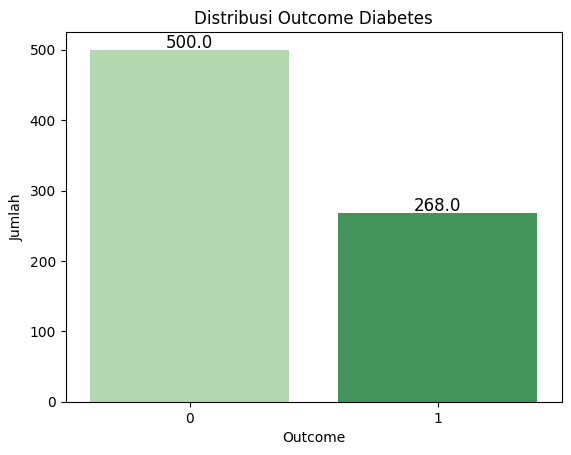

In [5]:
ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df)

# jumlah data per unik value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# plot
plt.title('Distribusi Outcome Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

**Insight:**

Data dengan outcome 0 (tidak menderita diabetes hampir 2 kali lebih banyak dibandingkan dengan outcome bernilai 1 (menderita diabetes).

Hal ini bisa berpengaruh pada saat proses pelatihan dimana model lebih hafal dengan data yang dominan dan gagal memprediksi data minoritas.

Sehingga, diperlukan penanganan untuk menyeimbangkan proporsi data atau pemilihan algoritma yang yang tahan akan imbalance data.

Opsi Solusi:
- Resampling data dengan melakukan Oversampling maupun Undersampling.
- Memilih algoritma yang tahan terhadap imbalanced data.

### **Cek distribusi data dengan visualisasi Histogram**

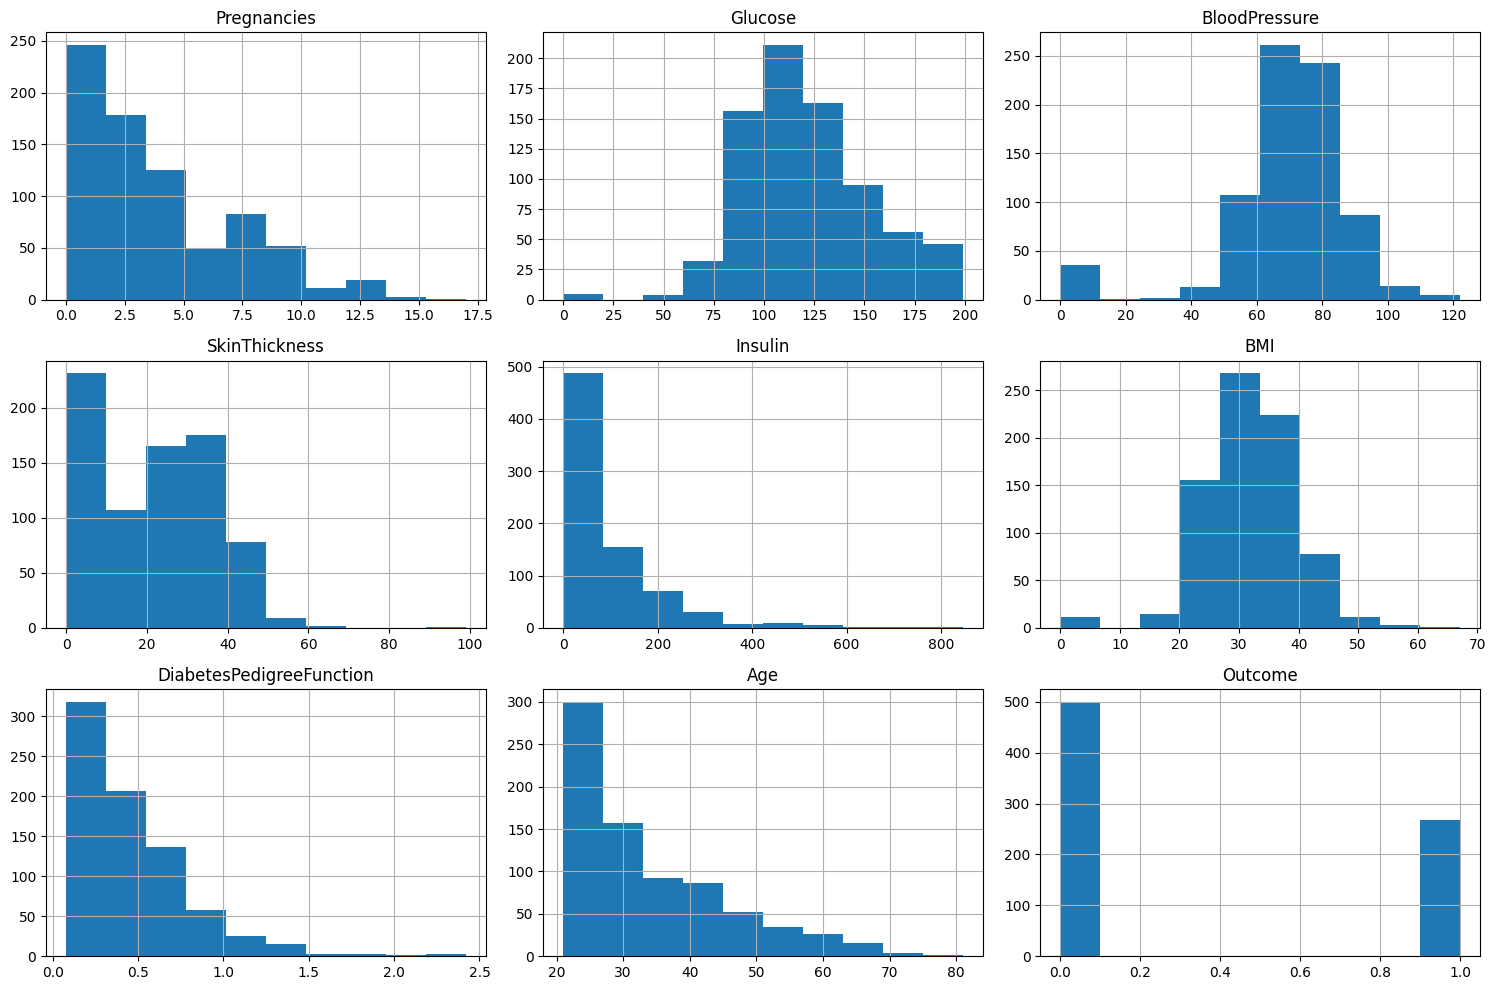

In [6]:
# plot histogram
diabetes_df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

**Insight:**
1.   Pregnancies:
  *   Distribusi skew ke kanan.
  *   Sebagian besar pasien dengan jumlah kehamilan 0-3 kali
  *   Terdapat sejumlah pasien dengan jumlah kehamilan tinggi (lebih dari 10 kali)
  *   Dapat melakukan normalisasi serta penanganan outlier.

2.   Glucose:
  *   Distribusi normal
  *   Kebanyakan pasien dengan kadar glukosa berkisar 80-150
  *   Distribusi fitur ini cukup bagus untuk klasifikasi

3.   BloodPressure:
  *   Distribusi normal, tetapi terdapat data dengan nilai 0 sehingga tidak sepenuhnya normal.
  *   Kebanyakan pasien dengan tekanan darah distolik 60-80 mmHg.
  *   Diperlukan penanganan pada nilai 0 baik dengan imputasi maupun drop data.

4.   SkinThickness:
  *   Distribusi skew ke kanan dan masih terdapat data dengan nilai 0.
  *   Diperlukan penanganan pada nilai 0 baik dengan imputasi maupun drop data.


5.   Insulin:
  *   Distribusi skew ke kanan, terdapat nilai 0, dan nilai yang cukup ekstream (kemungkinan outlier)
  *   Diperlukan penanganan pada nilai 0 dan outlier

6.   BMI:
  *   Distribusi hampir normal
  *   Kebanyakan pasien dengan BMI antara 25-40
  *   Diperlukan penanganan pada nilai 0 baik dengan imputasi maupun drop data.

7.   DiabetesPedigreeFunction:
  *   Distribusi sanagt skew ke kanan

8.   Age:
  *   Distribusi skew ke kanan
  *   semakin tua usia, semakin sedikit jumlah pasien

9.   Outcome:
  *   Distribusi tidak seimbang


### **Cek korelasi data dengan visualisasi Heatmap**

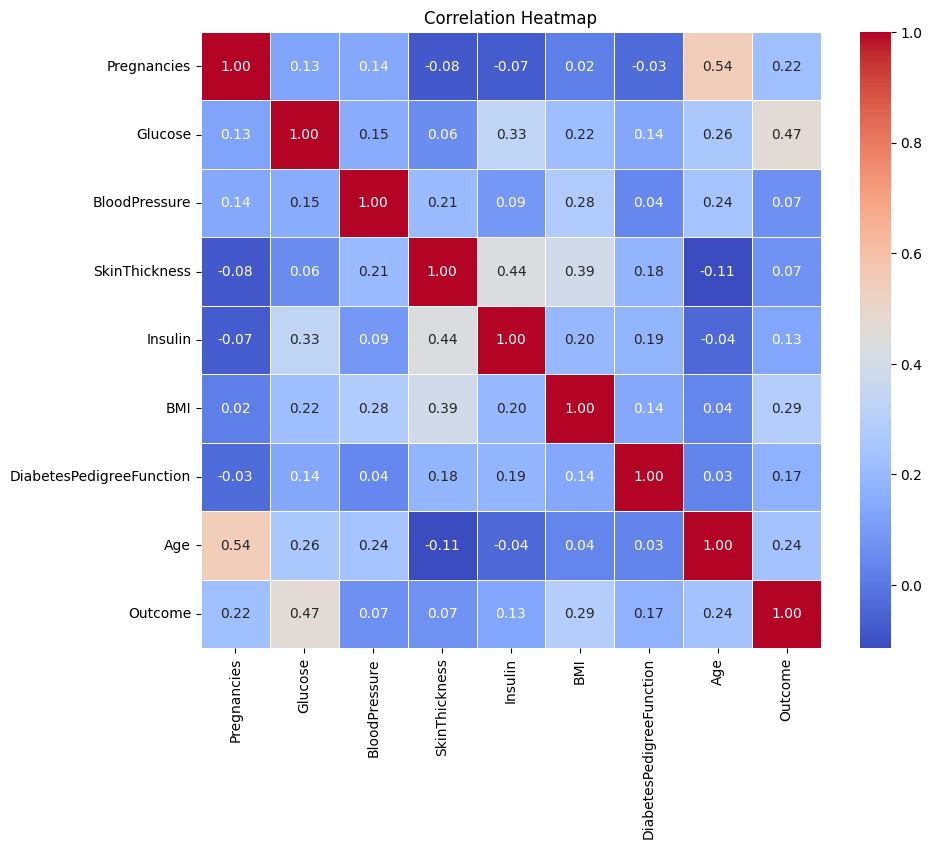

In [7]:
# hitung correlation matrix
correlation_matrix = diabetes_df.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insight:


*   Kadar glukosa menunjukkan pengaruh yang tertinggi terhadap outcome dibandingkan dengan fitur lainnya. Korelasi positif cukup kuat, artinya semakin tinggi kadar glukosa maka semakin besar kemungkinan diabetes.

*  Jumlah produksi Insulin dan skin thickness menunjukkan korelasi positf yang moderat. sehingga orang dengan insulin tinggi cenderung memiliki ketebalan kulit yang lebih besar.

*   Pregnancies dan Age memiliki korelasi positif yang cukup kuat yang menunjukkan semakin tua, semakin banyak kehamilan biasanya.

*  Secara keseluruhan tidak terdapat korelasi fitur yang sangat tinggi (>0.75) sehingga tidak perlu melakukan drop fitur karena multikolinearitas.

### **Cek Outlier di setiap fitur**

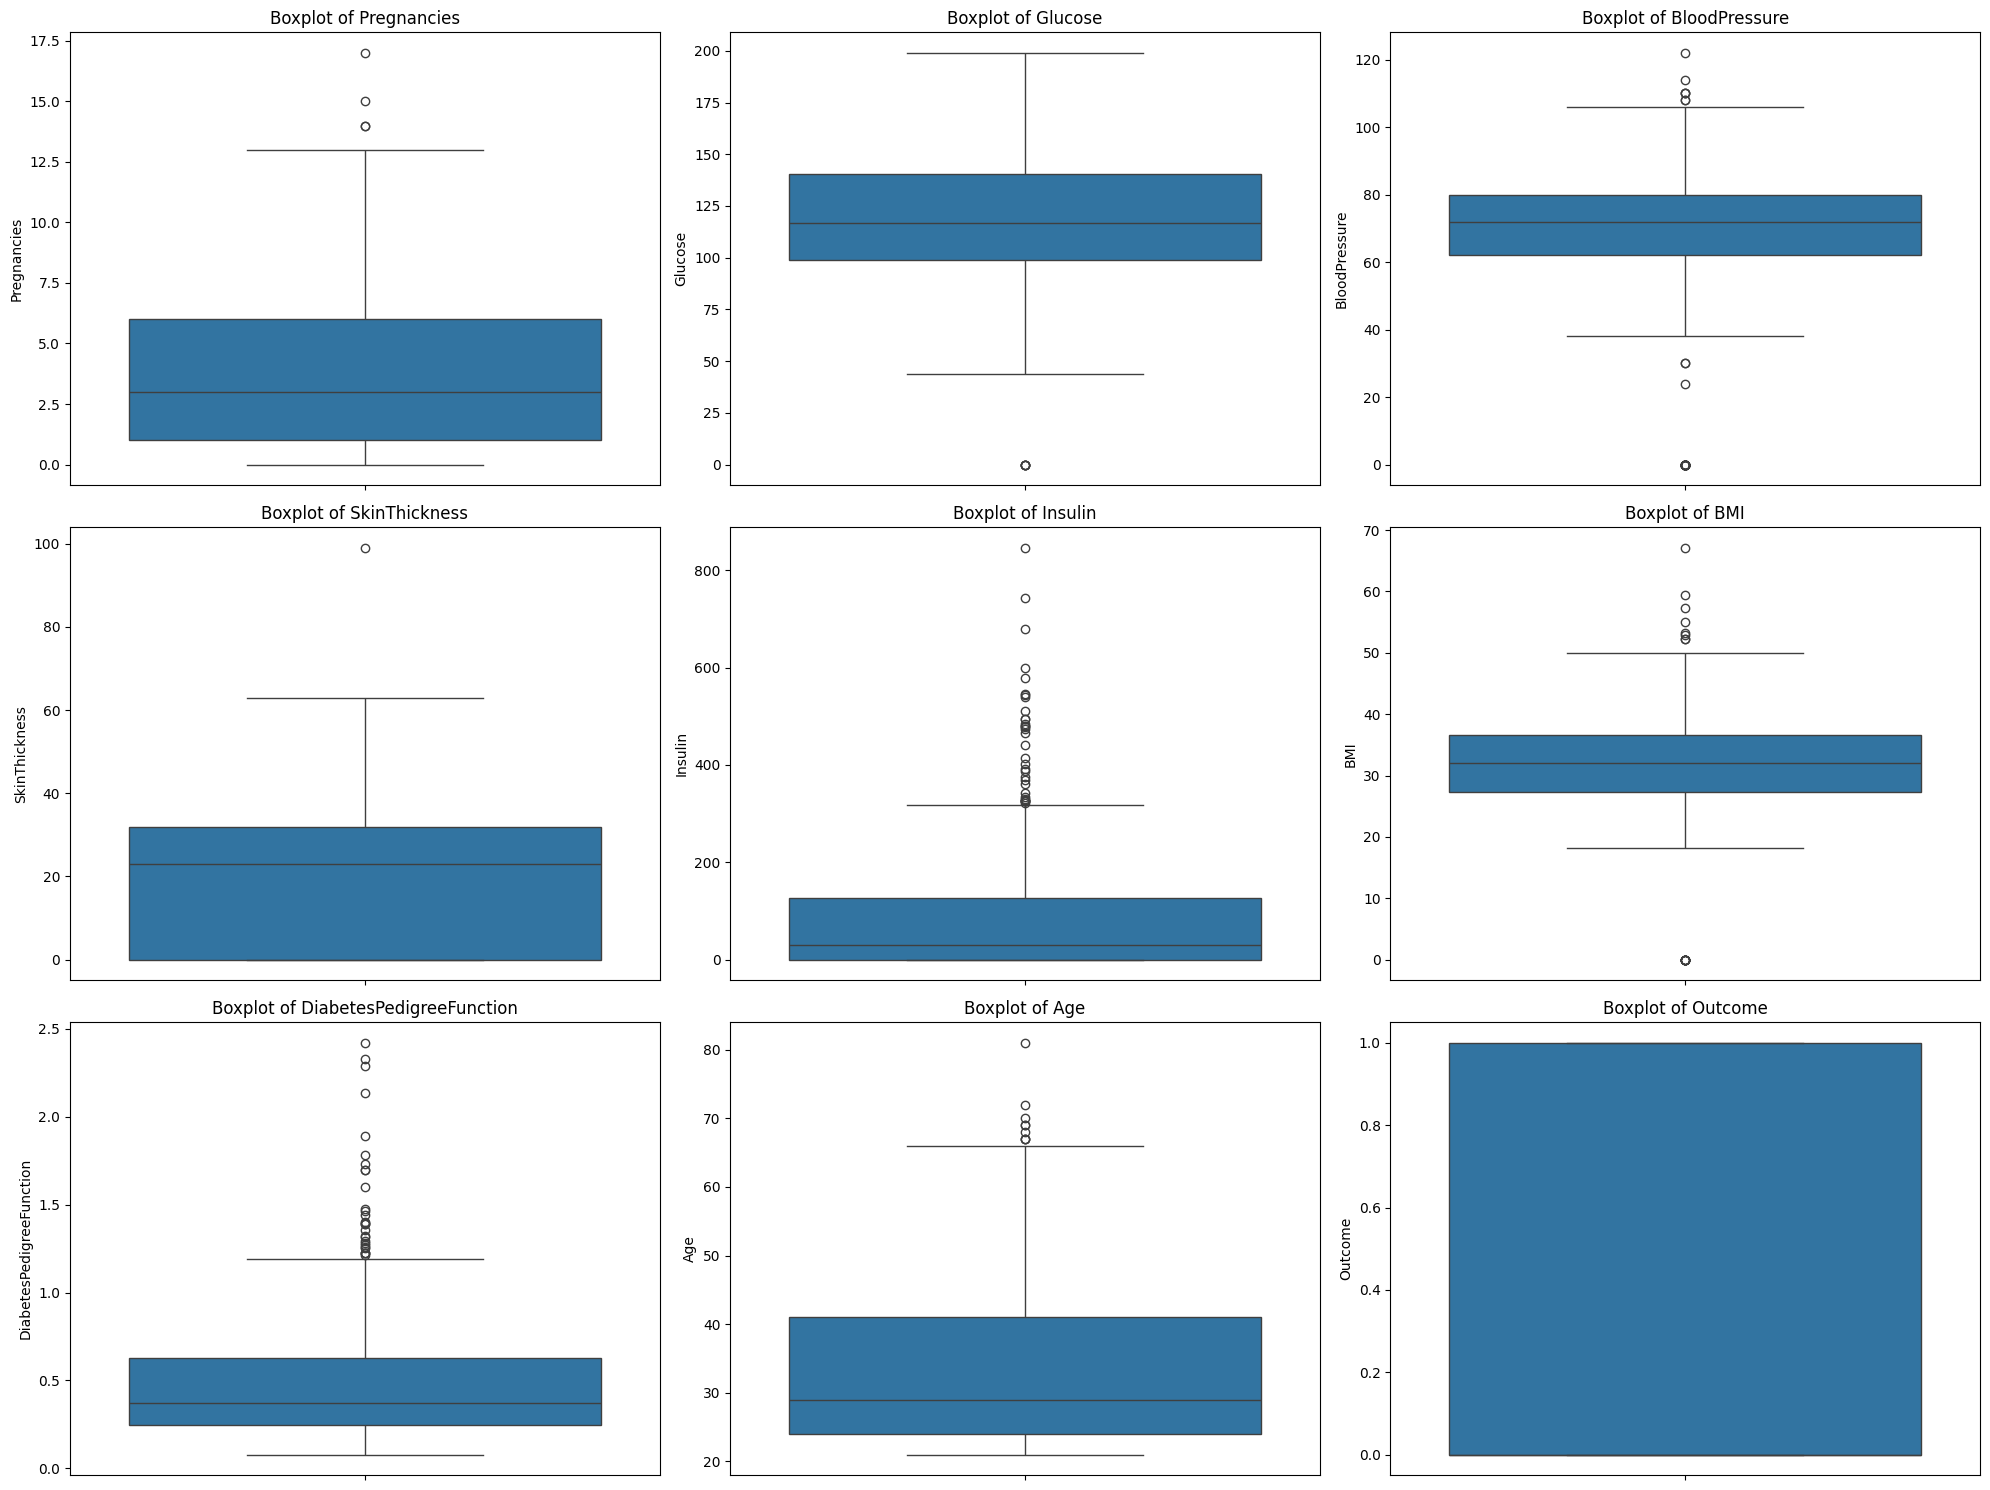

In [8]:
# boxplot
plt.figure(figsize=(20, 15))

for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Insight:**



*   Fitur Pregnancies memiliki beberapa outlier diatas yang bernilai >13.
*   Fitur Glucose memiliki outlier dengan nilai ekstrem (0), kemungkinan nilai ini tidak valid.
*   Fitur BloodPreasure memiliki beberapa outlier  dibawah dengan nilai ekstream mencapai 0, ini tidak masuk akal dan mengindikasikan invalid value.
*   Fitur Skin Thickness memiliki outlier dengan nilai yang sangat tinggi.
*   Fitur Insulin memiliki sangat banyak data outlier dengan nilai yang sangat tinggi
*   Fitur BMI memiliki cukup banyak outlier dengan nilai yang sangat tinggi dan terdapat juga outlier dengan nilai sangat kecil yaitu 0 yang kemungkinan merupakan invalid value.
*   Fitur DiabetesPredigreeFunction memiliki sangat banyak data outlier dengan nilai yang tinggi
*   Fitur Age memiliki beberapa outlier dengan nilai yang tinggi
*   Fitur outcome tidak memiliki outlier.


## **4. Data Preparation**

### **Data Treatment**

#### **1. Penanganan Invalid data**

##### **Invalid data Glucose**

In [9]:
glucose_zero = diabetes_df[diabetes_df['Glucose'] == 0]
print(glucose_zero.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0  24.7                     0.140   22        0
182            1        0             74             20       23  27.7                     0.299   21        0
342            1        0             68             35        0  32.0                     0.389   22        0
349            5        0             80             32        0  41.0                     0.346   37        1
502            6        0             68             41        0  39.0                     0.727   41        1


Catatan: Terdapat 5 (kecil) data dengan Glucosa bernilai 0. Maka dilakukan drop data.

In [10]:
print(f"Jumlah data sebelum: {len(diabetes_df)}")
diabetes_df = diabetes_df[diabetes_df['Glucose'] != 0]
print(f"Jumlah data sesudah: {len(diabetes_df)}")

Jumlah data sebelum: 768
Jumlah data sesudah: 763


##### **Invalid data BMI**

In [11]:
BMI_zero = diabetes_df[diabetes_df['BMI'] == 0]
print(BMI_zero.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome
9              8      125             96              0        0  0.0                     0.232   54        1
49             7      105              0              0        0  0.0                     0.305   24        0
60             2       84              0              0        0  0.0                     0.304   21        0
81             2       74              0              0        0  0.0                     0.102   22        0
145            0      102             75             23        0  0.0                     0.572   21        0
371            0      118             64             23       89  0.0                     1.731   21        0
426            0       94              0              0        0  0.0                     0.256   25        0
494            3       80              0              0        0  0.0                     0.174   22        0
522       

Catatan: Terdapat 8 (kecil) data dengan BMI bernilai 0. Maka dilakukan drop data.

In [12]:
print(f"Jumlah data sebelum: {len(diabetes_df)}")
diabetes_df = diabetes_df[diabetes_df['BMI'] != 0]
print(f"Jumlah data sesudah: {len(diabetes_df)}")

Jumlah data sebelum: 763
Jumlah data sesudah: 752


##### **Invalid data BloodPressure**

In [13]:
BloodPressure_zero = diabetes_df[diabetes_df['BloodPressure'] == 0]
print(BloodPressure_zero.to_string())
print(f"Jumlah pasien dengan BloodPressure = 0: {len(BloodPressure_zero)}")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
7             10      115              0              0        0  35.3                     0.134   29        0
15             7      100              0              0        0  30.0                     0.484   32        1
78             0      131              0              0        0  43.2                     0.270   26        1
172            2       87              0             23        0  28.9                     0.773   25        0
193           11      135              0              0        0  52.3                     0.578   40        1
222            7      119              0              0        0  25.2                     0.209   37        0
261            3      141              0              0        0  30.0                     0.761   27        1
266            0      138              0              0        0  36.3                     0.933   25        1
2

Catatan: Terdapat 28 baris data dengan Tekanan darah bernilai 0. Jika diperhatikan lagi, pada banyak invalid value dengna nilai serupa (0) pada kolom Skin Thickness dan Insulin.
Sebaiknya dilakukan drop data.

In [14]:
print(f"Jumlah data sebelum: {len(diabetes_df)}")
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] != 0]
print(f"Jumlah data sesudah: {len(diabetes_df)}")

Jumlah data sebelum: 752
Jumlah data sesudah: 724


##### **Invalid data SkinThickness**

In [15]:
SkinThickness_zero = diabetes_df[diabetes_df['SkinThickness'] == 0]
print(SkinThickness_zero.to_string())
print(f"Jumlah pasien dengan SkinThickness = 0: {len(SkinThickness_zero)}")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
2              8      183             64              0        0  23.3                     0.672   32        1
5              5      116             74              0        0  25.6                     0.201   30        0
10             4      110             92              0        0  37.6                     0.191   30        0
11            10      168             74              0        0  38.0                     0.537   34        1
12            10      139             80              0        0  27.1                     1.441   57        0
17             7      107             74              0        0  29.6                     0.254   31        1
21             8       99             84              0        0  35.4                     0.388   50        0
22             7      196             90              0        0  39.8                     0.451   41        1
2

Catatan: Terdapat 192 baris data dengan Skin Thickness bernilai 0. Nilai ini cukup tinggi. Sebaiknya dilakukan imputasi agar tidak kehilangan banyak data jika melakukan drop data.
Imputasi akan menggunakan median dari data yang valid (!=0).

In [16]:
# hitung Q1, Q3, dan IQR
valid_skin = diabetes_df[diabetes_df['SkinThickness'] != 0]['SkinThickness']

Q1 = valid_skin.quantile(0.25)
Q3 = valid_skin.quantile(0.75)
IQR = Q3 - Q1

# imputasi dengan median
median_skin = valid_skin.median()
print(f"Median SkinThickness: {median_skin}")

# proses imputasi
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0, median_skin)

# cek apakah masih terdapat invalid value
print(f"Jumlah 0 setelah imputasi: {(diabetes_df['SkinThickness'] == 0).sum()}")

Median SkinThickness: 29.0
Jumlah 0 setelah imputasi: 0


<ipython-input-16-1e91ecee7792>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0, median_skin)


##### **Invalid data Insulin**

In [17]:
Insulin_zero = diabetes_df[diabetes_df['Insulin'] == 0]
print(Insulin_zero.to_string())
print(f"Jumlah pasien dengan kadar Insulin = 0: {len(Insulin_zero)}")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64             29        0  23.3                     0.672   32        1
5              5      116             74             29        0  25.6                     0.201   30        0
10             4      110             92             29        0  37.6                     0.191   30        0
11            10      168             74             29        0  38.0                     0.537   34        1
12            10      139             80             29        0  27.1                     1.441   57        0
17             7      107             74             29        0  29.6                     0.254   31        1
2

Catatan: Terdapat 332 baris data dengan Insulin bernilai 0. Jumlah ini cukup tinggi. Sebaiknya dilakukan imputasi agar tidak kehilangan banyak data jika melakukan drop data.
Imputasi akan menggunakan metode IQR untuk menghilangkan outlier dan mengimputasi dengan median dari data tanpa outlier.

In [18]:
# hitung Q1, Q3, dan IQR
valid_insulin = diabetes_df['Insulin']

Q1 = valid_insulin.quantile(0.25)
Q3 = valid_insulin.quantile(0.75)
IQR = Q3 - Q1

# filter outlier berdasarkan IQR
filtered_insulin = valid_insulin[(valid_insulin >= Q1 - 1.5 * IQR) &
                                 (valid_insulin <= Q3 + 1.5 * IQR)]

# hitung median dari data yang sudah bersih dari outlier
clean_median = filtered_insulin.median()
print(f"Median Insulin setelah outlier removal: {clean_median}")

# Imputasi nilai 0 dengan median yang bersih dari outlier
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0, clean_median)

# cek apakah masih terdapat invalid value
print(f"Jumlah nilai 0 setelah imputasi: {(diabetes_df['Insulin'] == 0).sum()}")

Median Insulin setelah outlier removal: 38.0
Jumlah nilai 0 setelah imputasi: 0


In [19]:
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,38,33.6,0.627,50,1
1,1,85,66,29,38,26.6,0.351,31,0
2,8,183,64,29,38,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,29,38,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,29,38,37.6,0.191,30,0
11,10,168,74,29,38,38.0,0.537,34,1


#### **2. Penanganan Outlier**

##### **Outlier Pregnancies**

In [20]:
# hitung Q1, Q3, dan IQR untuk kolom Pregnancies
Q1 = diabetes_df['Pregnancies'].quantile(0.25)
Q3 = diabetes_df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter data untuk hanya menampilkan outlier
outliers = diabetes_df[(diabetes_df['Pregnancies'] < lower_bound) |
                       (diabetes_df['Pregnancies'] > upper_bound)]

# tabel outlier
print(outliers[['Pregnancies', 'Age', 'Outcome']])

     Pregnancies  Age  Outcome
88            15   43        1
159           17   47        1
298           14   46        1
455           14   38        1


In [21]:
print(f"Jumlah data sebelum menghapus outlier: {len(diabetes_df)}")

# drop outlier
diabetes_df = diabetes_df[(diabetes_df['Pregnancies'] >= lower_bound) &
                                  (diabetes_df['Pregnancies'] <= upper_bound)]

# yampilkan data setelah outlier dihapus
print(f"\nJumlah data setelah menghapus outlier: {len(diabetes_df)}")

Jumlah data sebelum menghapus outlier: 724

Jumlah data setelah menghapus outlier: 720


##### **Outlier BloodPressure**

In [22]:
Q1 = diabetes_df['BloodPressure'].quantile(0.25)
Q3 = diabetes_df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter data untuk hanya menampilkan outlier
outliers = diabetes_df[(diabetes_df['BloodPressure'] < lower_bound) |
                       (diabetes_df['BloodPressure'] > upper_bound)]

# tampilkan tabel outlier
print(outliers[['BloodPressure', 'Outcome']])

     BloodPressure  Outcome
18              30        0
43             110        1
84             108        1
106            122        0
125             30        1
177            110        1
362            108        0
549            110        0
597             24        0
599             38        0
658            106        0
662            106        1
672            106        0
691            114        1


In [23]:
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

outliers = diabetes_df[(diabetes_df['BloodPressure'] < lower_bound) |
                       (diabetes_df['BloodPressure'] > upper_bound)]

print(outliers[['BloodPressure', 'Outcome']])

Empty DataFrame
Columns: [BloodPressure, Outcome]
Index: []


<ipython-input-23-316d9c735da1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].apply(


##### **Outlier SkinThickness**

In [24]:
Q1 = diabetes_df['SkinThickness'].quantile(0.25)
Q3 = diabetes_df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk hanya menampilkan outlier
outliers = diabetes_df[(diabetes_df['SkinThickness'] < lower_bound) |
                       (diabetes_df['SkinThickness'] > upper_bound)]

# tampilkan tabel outlier
print(outliers[['SkinThickness', 'Outcome']])

     SkinThickness  Outcome
16              47        1
32              11        0
39              47        1
50              11        0
55              10        0
57              60        0
86              54        0
99              51        1
120             56        1
150             50        0
169             12        0
177             46        1
211             54        0
254              7        1
273             50        0
275             52        0
279             10        0
313             10        0
316             11        0
320             12        0
353             12        0
370             48        1
382              8        0
393             12        0
409             49        1
422             46        0
428             46        0
432             11        0
434              8        0
444             12        1
445             63        1
446             12        0
458             48        1
466             10        0
519              7  

In [25]:
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

outliers = diabetes_df[(diabetes_df['SkinThickness'] < lower_bound) |
                       (diabetes_df['SkinThickness'] > upper_bound)]

print(outliers[['SkinThickness', 'Outcome']])

Empty DataFrame
Columns: [SkinThickness, Outcome]
Index: []


##### **Outlier Insulin**

In [26]:
Q1 = diabetes_df['Insulin'].quantile(0.25)
Q3 = diabetes_df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk hanya menampilkan outlier
outliers = diabetes_df[(diabetes_df['Insulin'] < lower_bound) |
                       (diabetes_df['Insulin'] > upper_bound)]

# Tampilkan tabel outlier
print(outliers[['Insulin', 'Outcome']])

     Insulin  Outcome
8        543        1
13       846        1
53       300        1
54       342        0
56       304        1
73       270        0
111      495        1
139      325        0
144      284        0
153      485        0
162      285        0
186      495        1
199      318        1
206      280        1
215      271        1
220      478        1
228      744        0
231      370        1
247      680        0
248      402        0
258      375        0
279      278        0
286      545        0
296      360        1
360      325        1
364      293        0
370      465        1
375      325        1
388      285        1
392      415        0
395      275        0
409      579        1
412      310        0
415      474        1
425      277        1
480      328        1
486      480        0
519      326        0
561      274        1
574      330        0
584      600        1
606      293        1
608      272        0
612      321        1
645      4

In [27]:
diabetes_df['Insulin'] = diabetes_df['Insulin'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

outliers = diabetes_df[(diabetes_df['Insulin'] < lower_bound) |
                       (diabetes_df['Insulin'] > upper_bound)]

print(outliers[['Insulin', 'Outcome']])

Empty DataFrame
Columns: [Insulin, Outcome]
Index: []


##### **Outlier BMI**

In [28]:
Q1 = diabetes_df['BMI'].quantile(0.25)
Q3 = diabetes_df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk hanya menampilkan outlier pada kolom Pregnancies
outliers = diabetes_df[(diabetes_df['BMI'] < lower_bound) |
                       (diabetes_df['BMI'] > upper_bound)]

# Tampilkan tabel outlier
print(outliers[['BMI', 'Outcome']])

      BMI  Outcome
120  53.2        1
125  55.0        1
177  67.1        1
247  52.3        0
303  52.9        1
445  59.4        1
673  57.3        0


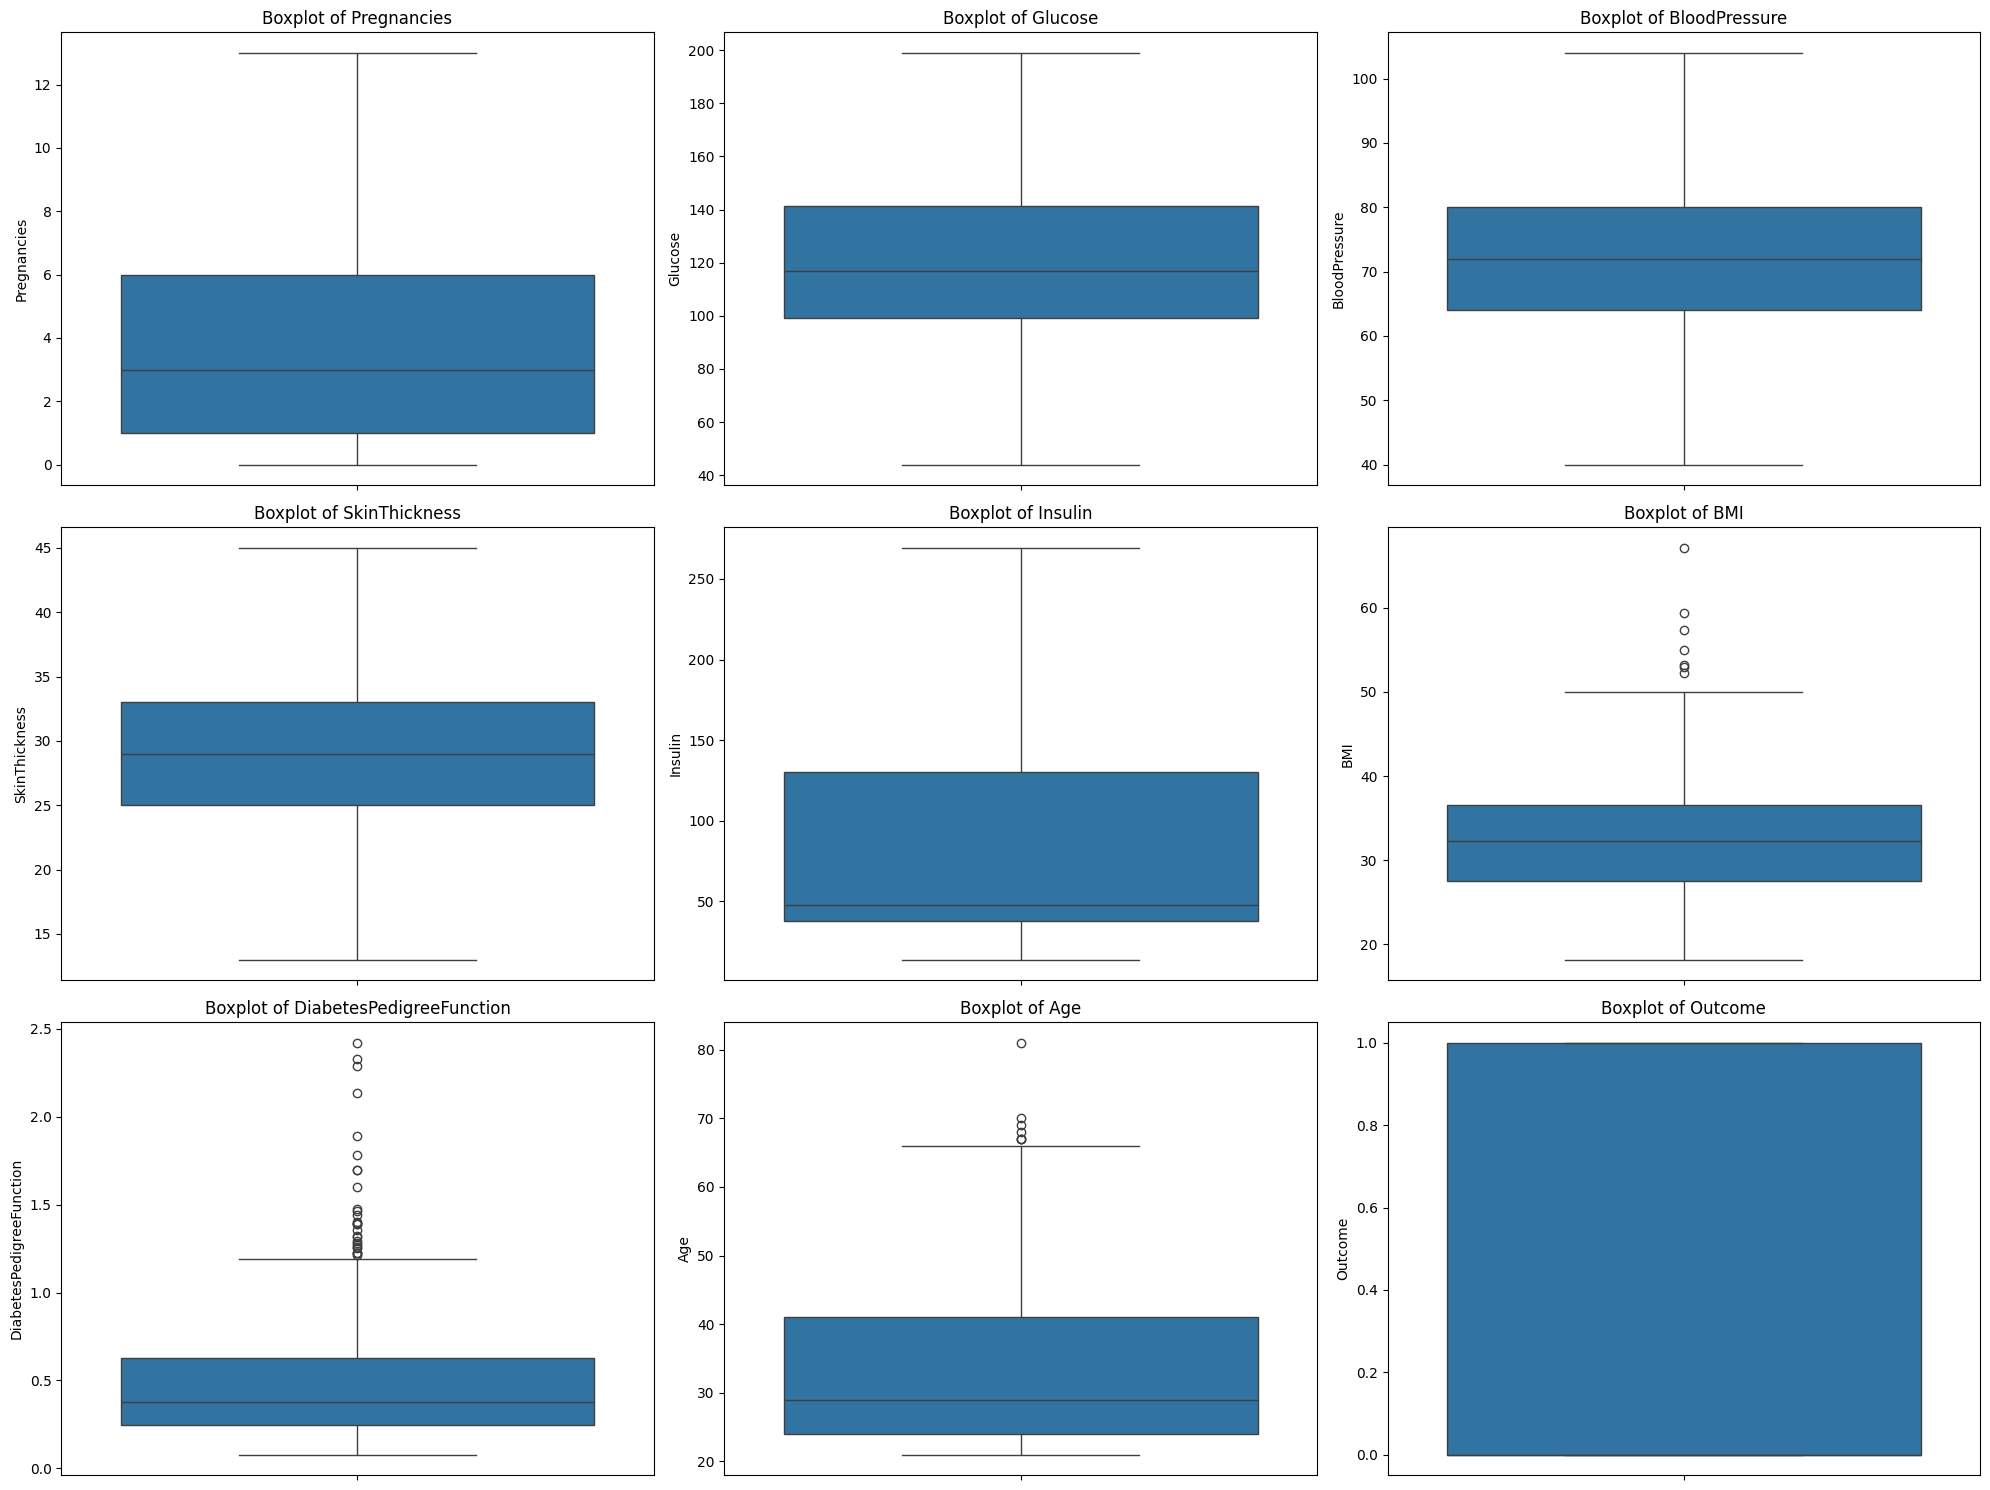

In [29]:
# boxplot
plt.figure(figsize=(20, 15))

for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### **3. Penanganan Imbalance Data**

<ipython-input-30-ee6324638e25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df)


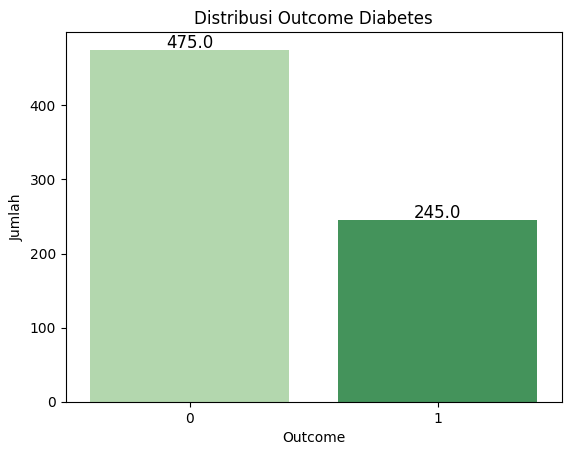

In [30]:
ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df)

# jumlah data per unik value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# plot
plt.title('Distribusi Outcome Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

Catatan: Distribusi Outcome menunjukkan imbelance data dimana data bernilai 0 (tidak mengidap diabetes) berjumlah hampir 2 kali lipat dari data lainnya.
Akan dilakukan Resampling terhdapa data minoritas agar menghasilkan jumlah data yang seimbang di setiap outcome. Metode yang digunakan adalah SMOTE (Synthetic Minority Over-sampling Technique). Dengan metode ini akan menghasilkan data baru pada kelas minoritas yaitu oucome = 1 tanpa mengubah variasi atau informasi pada data asli.

<ipython-input-31-bdfb8cfcb35c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df_balanced_smote)


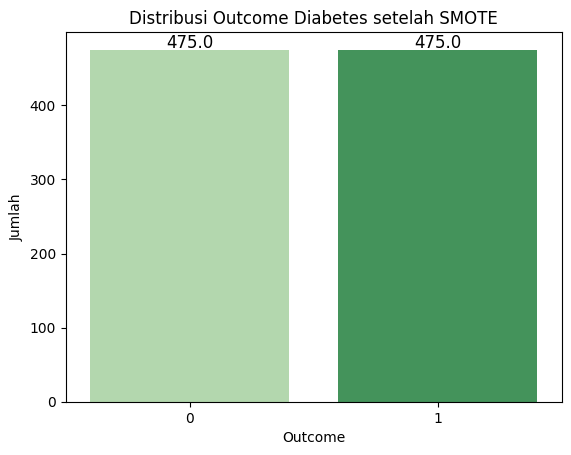

In [31]:
# pisahkan fitur dan target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# terapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# gabungkan kembali fitur dan target setelah SMOTE
diabetes_df_balanced_smote = pd.DataFrame(X_resampled, columns=X.columns)
diabetes_df_balanced_smote['Outcome'] = y_resampled

# visualisasi distribusi setelah penyeimbangan
ax = sns.countplot(x='Outcome', palette="Greens", data=diabetes_df_balanced_smote)

# jumlah data per unik value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# plot
plt.title('Distribusi Outcome Diabetes setelah SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

### **Data Splitting**

In [32]:
# pisahkan fitur dan target
X = diabetes_df_balanced_smote.drop('Outcome', axis=1)
y = diabetes_df_balanced_smote['Outcome']  # Kolom target

# split menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cek ukuran hasil split data
print(f"Training data: {X_train.shape[0]} samples")
print(f"Test data: {X_test.shape[0]} samples")

Training data: 760 samples
Test data: 190 samples


## **5. Model Development**

Pada tahap ini, akan dilakukan pengembangan model machine learning dengan tiga algoritma, yang antara lain:

1. SVM
2. Boosting Algorithm (AdaBoostClassifier)
3. Logistic Regression

### **SVM**

SVM Accuracy: 0.7473684210526316


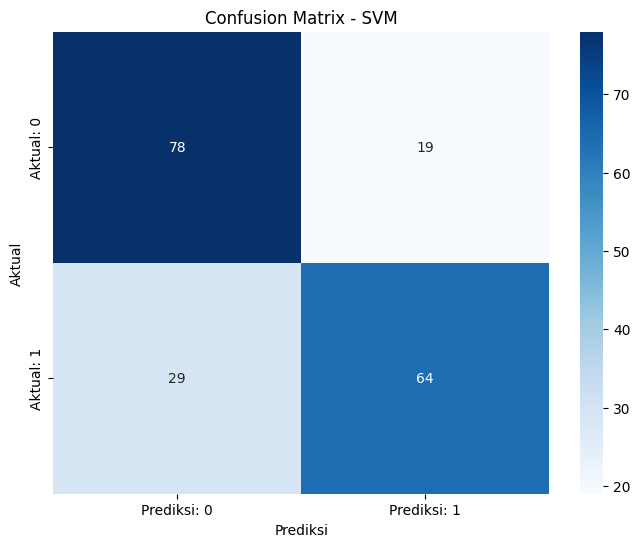

In [35]:
svm = SVC(kernel='rbf', probability=True, random_state=55)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


### **Boosting Algorithm**

AdaBoost Accuracy: 0.8315789473684211


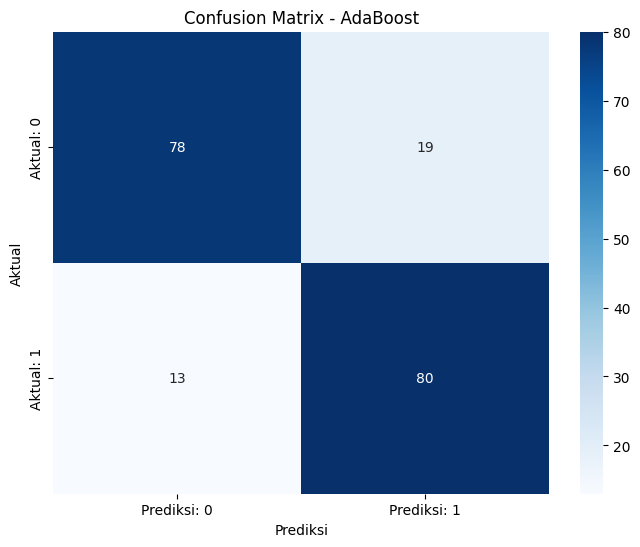

In [47]:
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_boost))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_boost)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### **Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7368421052631579


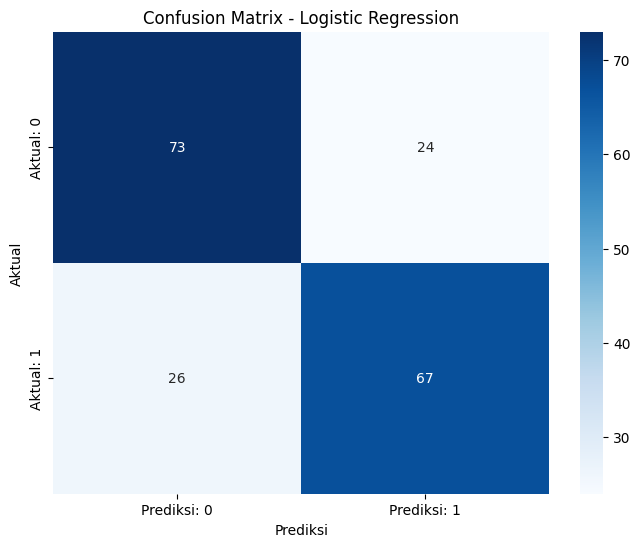

In [46]:
# Logistic Regression
log_reg = LogisticRegression(random_state=55)

# melatih model
log_reg.fit(X_train, y_train)

# prediksi pada data test
y_pred = log_reg.predict(X_test)

# print akurasi
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

## **6. Evaluasi Model**

In [39]:
# dictionary untuk semua model
model_dict = {
    "SVM": svm,
    "AdaBoost": boosting,
    "LogisticRegression": log_reg,

}

In [40]:
# dataframe untuk menyimpan hasil evaluasi
eval_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

In [41]:
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)

    eval_df.loc[name] = [
        accuracy_score(y_test, y_pred),
        report['1']['precision'],
        report['1']['recall'],
        report['1']['f1-score'],
        auc
    ]

# print hasil evaluasi
print(eval_df)

                    Accuracy  Precision    Recall  F1-Score       AUC
SVM                 0.747368   0.771084  0.688172  0.727273  0.863541
AdaBoost            0.831579   0.808081  0.860215  0.833333  0.881665
LogisticRegression  0.736842   0.736264  0.720430  0.728261  0.804900


🔎 **Analisis Evaluasi Hasil Proyek:**

**1. SVM**
- Accuracy model sebesar 0.747368 menunjukkan model berhasil memprediksikan dengan benar sebesar 74% dari total data.
- Precision sebesar 0.771084, berarti model bisa memprediksi apakah mengidap diabetes dengan kemungkinan cukup besar bahwa hasil prediksi benar.
- Recall hanya mencapai 0.6882, berarti banyak kasus diabetes yang salah prediksi.
- F1-Score menunjukkan keseimbangan antara precision dan recall model mencapai 0.727273
- AUC cukup tinggi yaitu 0.863541, ini menunjukkan model cukup baik dalam membedakan kelas 0 dan 1.
- ModelSVM yang dihasilkan cukup mampu membedakan kelas namun cenderung melewatkan kasus diabetes terlihat dari kasus kesalahan prediksi kasus diabetes menjadi tidak diabetes.

**2. Boosting Algorithm (AdaBoostClassifier)**
- Accuracy mencapai 0.831579, berarti model mampu memprediksi 83,2% data dari keseluruhan data dengan benar.
- Precision cukup tinggi yaitu 0.808081, berarti model mungkin benar memprediksikan kasus pengidap diabetes dengan benar cukup tinggi.
- Recall mencapai 0.860215, berarti model mampu mengidentifikasi sekitar 86.0% dari semua kasus diabetes.
- F1-Score mencapai 0.833333, menunjukkan precision dan recall cukup seimbang.
- AUC mencapai 0.881665, berarti model cukup baik dalam membedakan kelas.
- kinerja cukup baik di semua metrik, Recall dan F1-Score yang cukup tinggi menunjukkan kemampuan model yang baik dalam prediksi setiap kelas.

**3. Logistic Regression**
- Akurasi sebesar 0.736842, merupakan yang terkecil dari model lainnya.
-  Precision bernilai 0.736264 cukup rendah dibandingkan model svm dan adaboost.
- Recall mencapai 0.720430 lebih tinggi dari pada model svm, ini berarti model lebih mampu memprediksi kasus diabetes dengan benar dibanding model svm, namun nilai ini cukup baik.
- F1-Score mencapai 0.728261, artinya keseimbangan precision dan recall masih mencapai 72%.
- AUC mencapai 0.804900, model ini cukup dalam membedakan dua kelas.
- Performa rata-rata di semua metrik, tidak terlalu baik tapi kalah dari modeal svm dan adaboost.


---


📑 Rangkuman Evaluasi:
- **Akurasi Tertinggi**: AdaBoost
- **Recall Tertinggi**: AdaBoost
- **AUC Tertinggi**: AdaBoost
- **Precision Tertinggi**: AdaBoost
- **F1-Score Tertinggi**: AdaBoost

---
✨ Model Terbaik:

**AdaBoost**merupakan model terbaik untuk tugas klasifikasi prediksi diabetes dibandingkan model yang telah dihasilkan lainnya karena performanya yang stabil dan konsisten


#### **Pengujian dengan data tes**

In [48]:
# ambil 1 sampel dari data uji secara random
sample_idx = np.random.choice(X_test.index)
prediksi = X_test.loc[[sample_idx]].copy()
y_true_sample = y_test.loc[sample_idx]

# dictionary untuk menyimpan hasil prediksi
pred_dict = {'y_true': [y_true_sample]}

# loop setiap model untuk prediksi
for name, model in model_dict.items():
    pred = model.predict(prediksi)
    pred_dict[f'prediksi_{name}'] = pred

# print hasil prediksi
hasil_prediksi = pd.DataFrame(pred_dict)
print(hasil_prediksi)

   y_true  prediksi_SVM  prediksi_AdaBoost  prediksi_LogisticRegression
0       1             1                  1                            1


In [43]:
# print data yang diprediksi sebelumnya
X_test.loc[[sample_idx]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
467,7,94,64.0,25.0,79.0,33.3,0.738,41
